# Linear Regression

## Basics
linear regression is a linear approach for modelling the relationship between a scalar response $y$ (dependent variable) and a set of independent variables $\{x_1, \dots, x_p\}$.

$$
y = \sum_{i=1}^p \beta_i x_i + \beta_0 + \varepsilon, \quad \varepsilon \sim \mathcal{N}(0,\sigma^2)
$$

$\beta_0$ is called bias/intercept, other $\beta_i$'s are coefficients. This relationship is modeled through an error variable $\varepsilon$ — an unobserved random variable that adds "noise" to the linear relationship between the dependent variable and regressors. 

### Matrix Form
The goal is to learn $\beta_i$'s from $n$ samples of pair $\{\mathbf{x}_j, y_j\}_{j=1}^n$, by assuming

$$
y_j =  \mathbf{x}_j^\top \boldsymbol\beta + \varepsilon_j, \quad j = 1, \dots, n
$$

with $\mathbf{x}_j=(1, x_{j,1}, \dots, x_{j,p})^\top\in\mathbb{R}^{p+1}$, $\boldsymbol\beta = (\beta_0, \beta_1,\dots, \beta_p)^\top\in\mathbb{R}^{p+1}$. $x_{j,1}, \dots, x_{j,p}$ are the $p$ features of the $j$-th sample.

Stack the $n$ equations together and write in matrix notation as

$$
\mathbf{y} = \mathbf{X} \boldsymbol\beta + \boldsymbol\varepsilon
$$

where $\mathbf{y} = (y_1,\dots,y_n)^\top$, $\mathbf{X} = (\mathbf{x}_1, \dots, \mathbf{x}_n)^\top\in\mathbb{R}^{n\times (p+1)}$. Each row of $\mathbf{X}$ represents a sample $\mathbf{x}_j)^\top$.


### Least Squares Estimation

$$
\boldsymbol\beta^* = \arg\min_{\boldsymbol\beta\in\mathbb{R}^{p+1}} \; L(\boldsymbol\beta) :=
\|\mathbf{X} \boldsymbol\beta - \mathbf{y} \|^2 = \sum_{j=1}^n \; (\mathbf{x}_j^\top \boldsymbol\beta  - y_j)^2
$$

Closed-form solution by setting 
$\nabla L(\boldsymbol\beta^*) = \mathbf{X}^\top(\mathbf{X} \boldsymbol\beta^* - \mathbf{y}) = \mathbf{0}$, then

$$
\boldsymbol\beta^* = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

#### Prediction 
For any sample $\mathbf{x} = (1, x_1,\dots, x_p)^\top$, the prediction is

$$
\hat{y} =  \mathbf{x}^\top \boldsymbol\beta^*
$$

For a set of $N$ samples with data matrix $\mathbf{X}$, the predictions are

$$
\hat{\mathbf{y}} =  \mathbf{X} \boldsymbol\beta^*
$$

#### Mean Squared Error

Mean Squared Error (MSE) measures the discrepancy between true respose $\mathbf{y}$ and the predicted vaules $\hat{\mathbf{y}}$:

$$
\mbox{MSE}\, (\hat{\mathbf{y}}, \mathbf{y}) 
= \frac{1}{N} \sum_{i=1}^N \, (\hat{y}_i - y_i)^2
$$

### Regularization Variants

#### Ridge Regression 
$$
\min_{\boldsymbol\beta\in\mathbb{R}^{p+1}} \; \frac{1}{2}\|\mathbf{X} \boldsymbol\beta - \mathbf{y} \|^2 + \lambda \|\boldsymbol\beta\|^2
$$
with the closed-form solution:

$$
\boldsymbol\beta^* = (\mathbf{X}^\top \mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X}^\top \mathbf{y}
$$

#### LASSO Regression

[LASSO](https://en.wikipedia.org/wiki/Lasso_(statistics)) (least absolute shrinkage and selection operator) is famous for feature selection, as $\ell_1$ penalty yeilds **sparse** $\boldsymbol\beta$ solution:

$$
\min_{\boldsymbol\beta\in\mathbb{R}^{p+1}} \; \frac{1}{2}\|\mathbf{X} \boldsymbol\beta - \mathbf{y} \|^2 + \lambda \|\boldsymbol\beta\|_1
$$
with no closed-form solution.

With increasing value of $\lambda$ which means increasing regularization strength, the absolute values of weights would need to decrease (shrink) to keep the overall value of loss function minimized. The optimization of LASSO loss function results in some of the weights becoming zero and hence can be seen as method of selection of the features. Pay attention to usage of words, shrinkage, selection and absolute. This is why LASSO is termed as Least absolute shrinkage and selection operator.

## Implementation with Python

We implement linear regression with Python and create a class of model called `LinearReg`. Resembling ``sklearn``, we also add object-oriented methods such as ``fit`` and ``predict``.

**Underscore before the function name is how we declare a method to be private in Python**

In [121]:
class LinearReg(object):
    
    def __int__(self):
        if len(X.shape) == 1: # if X is 1D array, convert X into 2D array
            X  = self._reshape_x(X) 
            
        self.params = []
        
    def fit(self, X, y):  
        X = self._concatenate_ones(X)
        self.params = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
        
    def predict(self, X):
        bias = self.params[0]
        coeff = self.params[1:]
        y_preds = []
            
        for x in X:
            y_preds.append(x.dot(coeff) + bias)
            
        return y_preds
    
    def mse(self, y_preds, y):
        return np.mean((y-y_preds)**2)
        
    def mae(self, y_preds, y):
        return np.mean(np.abs(y-y_preds))
    
    def rmse(self, y_preds, y):
        return np.sqrt(self.mse(y_preds, y))
        
    def _reshape_x(self, X):
        return X.reshape(1,-1) 
    
    def _concatenate_ones(self, X):
        ones = np.ones(shape=X.shape[0]).reshape(-1,1)
        return np.concatenate((ones, X), axis = 1)

## Boston Housing Dataset


The Boston Housing Dataset is a ``sklearn`` built-in dataset. It is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. 

The following describes the dataset columns:

* CRIM - per capita crime rate by town

* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

* INDUS - proportion of non-retail business acres per town.

* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

* NOX - nitric oxides concentration (parts per 10 million)

* RM - average number of rooms per dwelling

* AGE - proportion of owner-occupied units built prior to 1940

* DIS - weighted distances to five Boston employment centres

* RAD - index of accessibility to radial highways

* TAX - full-value property-tax rate per $10,000

* PTRATIO - pupil-teacher ratio by town

* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

* LSTAT - % lower status of the population

* MEDV - Median value of owner-occupied homes in $1000's

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

### Check out the Data

In [3]:
bh = datasets.load_boston()

In [4]:
X = pd.DataFrame(data = bh.data, columns = bh.feature_names)
y = pd.DataFrame(data = bh.target, columns = ['MEDV'])
X.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [23]:
y.head(10)

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [24]:
print(X.shape)

(506, 13)


# Plotting

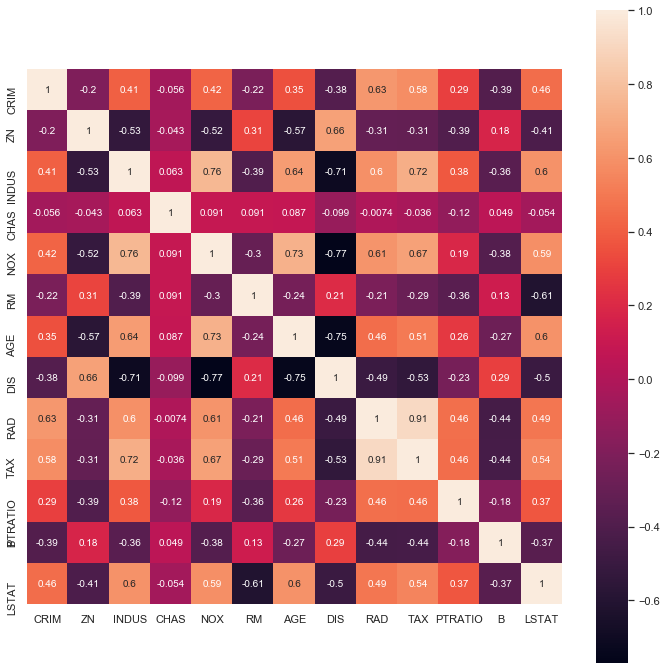

In [33]:
# correlation matrix of features
plt.figure(figsize = (12,12))
ax = sns.heatmap(X.corr(),annot=True)
ax.set_aspect("equal")

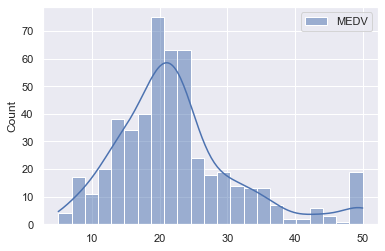

In [34]:
# distribution plot
sns.histplot(y, kde = True)

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [11]:
# import module to split the data
from sklearn.model_selection import train_test_split
# X - argument relates to the features
# y - argument relates to the labels
# test_size - 20% of dataset is used for testing, 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**The data is stored in DataFrames**

In [12]:
print(type(X_train))
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

<class 'pandas.core.frame.DataFrame'>
(404, 13) (404, 1)
(102, 13) (102, 1)


## 1. Our Own Implementation 

In [37]:
class LinearReg(object):
    
    def __int__(self):
        if len(X.shape) == 1: # if X is 1D array, convert X into 2D array
            X  = self._reshape_x(X) 
        self.params = []
        
    def fit(self, X, y):
        
        X = self._concatenate_ones(X)
        self.params = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
        
    def predict(self, X):
        bias = self.params[0]
        coeff = self.params[1:]
        y_preds = []
            
        for x in X:
            y_preds.append(x.dot(coeff) + bias)
            
        return y_preds
    
    def mse(self, y_preds, y):
        return np.mean((y-y_preds)**2)
    
    def mae(self, y_preds, y):
        return np.mean(np.abs(y-y_preds))
    
    def rmse(self, y_preds, y):
        return np.sqrt(self.mse(y_preds, y))
        
    def _reshape_x(self, X):
        return X.reshape(1,-1) 
    
    def _concatenate_ones(self, X):
        ones = np.ones(shape=X.shape[0]).reshape(-1,1)
        return np.concatenate((ones, X), axis = 1)

**Convert dataframes into numpy arrays**

In [38]:
X_tr, y_tr = np.array(X_train), np.array(y_train)
X_te, y_te = np.array(X_test), np.array(y_test)

**Fit the model**

In [39]:
ols = LinearReg()
ols.fit(X_tr, y_tr)

In [40]:
ols.params

array([[ 3.29061309e+01],
       [-9.89913563e-02],
       [ 4.25047578e-02],
       [ 1.67390094e-02],
       [ 3.06437882e+00],
       [-1.56462528e+01],
       [ 4.01888422e+00],
       [-8.31558474e-04],
       [-1.44628034e+00],
       [ 2.67827281e-01],
       [-1.04725485e-02],
       [-8.88651815e-01],
       [ 8.25262805e-03],
       [-5.49367192e-01]])

**Make predictions for test set**

In [41]:
y_preds = ols.predict(X_te)
print(y_preds[0])
print(y_te[0])

[40.38909533]
[50.]


In [42]:
print('Mean Absolute Error on test set is', ols.mae(y_preds, y_te))
print('Mean Squared Error on test set is', ols.mse(y_preds, y_te))
print('Root Mean Squared Error on test set is', ols.rmse(y_preds, y_te))

Mean Absolute Error on test set is 3.9994042530538643
Mean Squared Error on test set is 33.26891855791997
Root Mean Squared Error on test set is 5.7679215110748485


## 2. Linear Regression with Scikit-learn 

In [13]:
# import module for linear regression
from sklearn.linear_model import LinearRegression

In [14]:
# create a linear regression object
lm = LinearRegression()

In [15]:
# fit the model using training dataset
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [16]:
# print the intercept
print(lm.intercept_)

[32.90613091]


In [17]:
print(lm.coef_)

[[-9.89913563e-02  4.25047578e-02  1.67390094e-02  3.06437882e+00
  -1.56462528e+01  4.01888422e+00 -8.31558474e-04 -1.44628034e+00
   2.67827281e-01 -1.04725485e-02 -8.88651815e-01  8.25262805e-03
  -5.49367192e-01]]


In [18]:
# create a dataframe to evaluate coeff
coeff_df = pd.DataFrame(data = lm.coef_.T, index = X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.098991
ZN,0.042505
INDUS,0.016739
CHAS,3.064379
NOX,-15.646253
RM,4.018884
AGE,-0.000832
DIS,-1.446280
RAD,0.267827
TAX,-0.010473


Interpreting the coefficients:


- Holding all other features fixed, a 1 unit increase in **CRIM** is associated with an **decrease of \$99**.
- Holding all other features fixed, a 1 unit increase in **ZN** is associated with an **increase of \$43**.
- Holding all other features fixed, a 1 unit increase in **INDUS** is associated with an **increase of \$3064**.
- Holding all other features fixed, a 1 unit increase in **CHAS** is associated with an **increase of \$2234**.
- Holding all other features fixed, a 1 unit increase in **NOX** is associated with an **decrease of \$15,646**.
- ...

###  Predictions from Model

$R^2$ coeff of determination score: https://en.wikipedia.org/wiki/Coefficient_of_determination.
1 is perfect prediction and 0 means that there is no linear relationship between $X$ and $y$.

In [19]:
lm.score(X_test,y_test)

0.703462307651588

In [20]:
predictions = lm.predict(X_test)

In [21]:
feature = X_test.iloc[[0]]
prediction = lm.predict(feature)
print(feature)
print()
print(prediction[0])
print(y_test.iloc[0])

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
195  0.01381  80.0   0.46   0.0  0.422  7.875  32.0  5.6484  4.0  255.0   

     PTRATIO       B  LSTAT  
195     14.4  394.23   2.97  

[40.38909533]
MEDV    50.0
Name: 195, dtype: float64


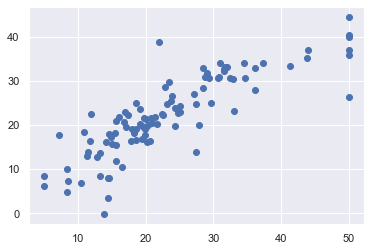

In [22]:
plt.scatter(y_test,predictions)

**Residual Histogram**

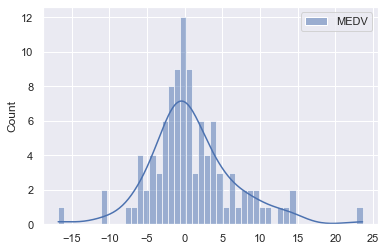

In [23]:
sns.histplot((y_test-predictions),bins=50, kde = True)

###  Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [24]:
from sklearn import metrics

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.9994042530538882
MSE: 33.2689185579199
RMSE: 5.767921511074843


## LASSO Regression

In LASSO, we need to choose the hyperparameter ``alpha`` for controlling the stength of regularization.

In [26]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.5) # alpha is the regularziation parameter
#
# Fit the Lasso model
#
lasso.fit(X_train, y_train)
#
# Create the model score
#
lasso.score(X_test, y_test)

0.6848138868883207

In [27]:
prediction = lasso.predict(feature)
print()
print(prediction[0])
print(y_test.iloc[0])


38.36244519590213
MEDV    50.0
Name: 195, dtype: float64


Once the model is fit, one can look into the coefficients by printing ``lasso.coef_`` command. It will be interesting to find that some of the coefficients value is found to be zero.

In [28]:
coeff_df = pd.DataFrame(data = lasso.coef_.T, index = X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.073850
ZN,0.043910
INDUS,-0.000000
CHAS,0.000000
NOX,-0.000000
RM,2.562975
AGE,0.005324
DIS,-0.920034
RAD,0.249899
TAX,-0.013307


### LASSO Regression Crossvalidation 

We could use cross-validation technique with LASSO regression. 

* ``sklearn.linear_model.LassoCV`` is used as Lasso regression cross validation implementation.

* ``LassoCV`` takes one of the parameter input as ``cv`` which represents number of folds to be considered while applying cross-validation. In the example below, the value of ``cv`` is set to 5.

* Entire dataset is used for training and testing purpose. This is unlike the 2-way or 3-way holdout method where the model is trained and tested on different data split.

* The model performance of ``LassoCV`` model is found to be greater than the Lasso regression algorithm.


In [29]:
from sklearn.linear_model import LassoCV

# Create an instance of Lasso Regression implementation
#
lasso_cv = LassoCV(cv=5)
#
# Fit the Lasso model
#
lasso_cv.fit(np.array(X), np.array(y).ravel())
#
# Create the model score
#
lasso_cv.score(X, y)

0.7024437179872696

In [30]:
coeff_df = pd.DataFrame(data = lasso_cv.coef_.T, index = X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.074266
ZN,0.049454
INDUS,-0.000000
CHAS,0.000000
NOX,-0.000000
RM,1.804385
AGE,0.011333
DIS,-0.813244
RAD,0.272284
TAX,-0.015425


## Exercise
Modify the Python code for ``LinearReg`` class so that it solves ridge regression problems.